## Data Cleaning

### Imports 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Read and explore Data.csv

In [ ]:
df = pd.read_csv("../data/Data.csv")
df.head()

,Date,Target_Name,Target_Industry_Macro,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA
0,14/08/2024,Sarsys-Asft AB,Industrials,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,2.88,"Measuring, Medical, Photo Equipment; Clocks",Public,"2,024.00",0.77,-12.55
1,08/08/2024,GSE Systems Inc,High Technology,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,13.17,Prepackaged Software,Public,"2,024.00",0.32,-12.91
2,06/08/2024,INEO Tech Corp,Consumer Products and Services,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,3.91,Business Services,Public,"2,024.00",3.97,-2.19
3,03/08/2024,Big Cheese Studio SA,High Technology,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,11.29,Prepackaged Software,Public,"2,024.00",4.16,10.72
4,01/08/2024,Braille Energy Systems Inc,Energy and Power,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,5.86,Electronic and Electrical Equipment,Public,"2,024.00",2.41,-4.33


In [ ]:
df.dtypes

Date                         object
Target_Name                  object
Target_Industry_Macro        object
Target_Industry_Mid          object
Target_Nation                object
Buyer_Name                   object
Buyer_Industry_Macro         object
Buyer_Industry_Mid           object
Buyer_Nation                 object
Target_Revenues              object
Target_EBITDA                object
Target_EV                    object
Target_Industry_Detailed     object
Target_Status                object
Year                         object
EV_Rev                      float64
EV_EBITDA                   float64
dtype: object

### Need to change some objects into floats and ints

In [ ]:
df['Target_Revenues']=df['Target_Revenues'].str.replace(',','')
df['Target_Revenues'] = df.Target_Revenues.astype(float)

df['Target_EBITDA']=df['Target_EBITDA'].str.replace(',','')
df['Target_EBITDA']=df.Target_EBITDA.astype(float)

df['Target_EV']=df['Target_EV'].str.replace(',','')
df['Target_EV']=df.Target_EV.astype(float)

df['Year']=df['Year'].str.replace(',','')
df['Year']=df.Year.astype(float)
df['Year']=df.Year.astype(int)

df.head()

,Date,Target_Name,Target_Industry_Macro,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA
0,14/08/2024,Sarsys-Asft AB,Industrials,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,2.88,"Measuring, Medical, Photo Equipment; Clocks",Public,2024,0.77,-12.55
1,08/08/2024,GSE Systems Inc,High Technology,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,13.17,Prepackaged Software,Public,2024,0.32,-12.91
2,06/08/2024,INEO Tech Corp,Consumer Products and Services,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,3.91,Business Services,Public,2024,3.97,-2.19
3,03/08/2024,Big Cheese Studio SA,High Technology,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,11.29,Prepackaged Software,Public,2024,4.16,10.72
4,01/08/2024,Braille Energy Systems Inc,Energy and Power,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,5.86,Electronic and Electrical Equipment,Public,2024,2.41,-4.33


### Change 'Date' from 'object' to 'datetime'

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date']

0       2024-08-14
1       2024-08-08
2       2024-08-06
3       2024-08-03
4       2024-08-01
           ...    
14770   2014-01-14
14771   2014-01-13
14772   2014-01-13
14773   2014-01-03
14774   2014-01-01
Name: Date, Length: 14775, dtype: datetime64[ns]

In [ ]:
df.dtypes

Date                        datetime64[ns]
Target_Name                         object
Target_Industry_Macro               object
Target_Industry_Mid                 object
Target_Nation                       object
Buyer_Name                          object
Buyer_Industry_Macro                object
Buyer_Industry_Mid                  object
Buyer_Nation                        object
Target_Revenues                    float64
Target_EBITDA                      float64
Target_EV                          float64
Target_Industry_Detailed            object
Target_Status                       object
Year                                 int64
EV_Rev                             float64
EV_EBITDA                          float64
dtype: object

### Check counts of target_industry_macro

In [ ]:
target_macro_df = df['Target_Industry_Macro'].value_counts().reset_index()
target_macro_df.columns = ['Target_Industry_Macro', 'Count']
target_macro_df

,Target_Industry_Macro,Count
0,High Technology,2372
1,Financials,2226
2,Industrials,1785
3,Energy and Power,1366
4,Healthcare,1339
5,Materials,1257
6,Consumer Products and Services,1015
7,Media and Entertainment,818
8,Real Estate,794
9,Consumer Staples,783


#### Remove 'Government and Agencies' rows

In [ ]:
df = df[df['Target_Industry_Macro'] != 'Government and Agencies']
df.shape

(14768, 17)

### Remove outliers

In [ ]:
#Keep EV_Rev < 100
df = df[df['EV_Rev'] < 20] # was 100
#Keep EV_EBITDA >-100 and <500
df = df[df['EV_EBITDA'] > 0] # was -100
df = df[df['EV_EBITDA'] < 100] # was 500
df.shape

(10742, 17)

### Remove  nulls

In [ ]:
df = df.dropna()

nan_count=df.isnull().sum()
print(nan_count)
print('')
print('New shape:', df.shape)

Date                        0
Target_Name                 0
Target_Industry_Macro       0
Target_Industry_Mid         0
Target_Nation               0
Buyer_Name                  0
Buyer_Industry_Macro        0
Buyer_Industry_Mid          0
Buyer_Nation                0
Target_Revenues             0
Target_EBITDA               0
Target_EV                   0
Target_Industry_Detailed    0
Target_Status               0
Year                        0
EV_Rev                      0
EV_EBITDA                   0
dtype: int64

New shape: (10740, 17)


### One hot encoding

In [ ]:
country_to_region = {
    'United States': 'North America',
    'Canada': 'North America',
    'Greenland': 'North America',
    'France': 'Western Europe',
    'Germany': 'Western Europe',
    'Netherlands': 'Western Europe',
    'Belgium': 'Western Europe',
    'Luxembourg': 'Western Europe',
    'Switzerland': 'Western Europe',
    'Austria': 'Western Europe',
    'Liechtenstein': 'Western Europe',
    'Monaco': 'Western Europe',
    'United Kingdom': 'UK',
    'Jersey': 'UK',
    'Guernsey': 'UK',
    'Isle of Man': 'UK',
    'Ireland': 'UK',
    'Sweden': 'Nordics',
    'Norway': 'Nordics',
    'Denmark': 'Nordics',
    'Finland': 'Nordics',
    'Iceland': 'Nordics',
    'Poland': 'Eastern Europe',
    'Bosnia and Herzegovina': 'Eastern Europe',
    'Lithuania': 'Eastern Europe',
    'Bulgaria': 'Eastern Europe',
    'Russia': 'Eastern Europe',
    'Estonia': 'Eastern Europe',
    'Latvia': 'Eastern Europe',
    'Hungary': 'Eastern Europe',
    'Romania': 'Eastern Europe',
    'Ukraine': 'Eastern Europe',
    'Moldova': 'Eastern Europe',
    'Serbia': 'Eastern Europe',
    'Slovenia': 'Eastern Europe',
    'North Macedonia': 'Eastern Europe',
    'Montenegro': 'Eastern Europe',
    'Slovakia': 'Eastern Europe',
    'Czech Republic': 'Eastern Europe',
    'Portugal': 'Southern Europe',
    'Italy': 'Southern Europe',
    'Spain': 'Southern Europe',
    'Greece': 'Southern Europe',
    'Croatia': 'Southern Europe',
    'Cyprus': 'Southern Europe',
    'Malta': 'Southern Europe',
    'Gibraltar': 'Southern Europe',
    'Turkey': 'Southern Europe'
}

# Apply the updated mapping to create a new column
df['Target_Region'] = df['Target_Nation'].map(country_to_region)

# One-hot encode the columns
df['Target_Region_A'] = df['Target_Region']
df['Target_Macro_A'] = df['Target_Industry_Macro']
df['Target_Status_A'] = df['Target_Status']
df = pd.get_dummies(df, columns=['Target_Region'])
df = pd.get_dummies(df, columns=['Target_Industry_Macro'])
df = pd.get_dummies(df, columns=['Target_Status'])

In [ ]:
df = df.drop(columns=['Target_Status_Private'])
# Display the updated dataframe
df

,Date,Target_Name,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,...,Target_Industry_Macro_Financials,Target_Industry_Macro_Healthcare,Target_Industry_Macro_High Technology,Target_Industry_Macro_Industrials,Target_Industry_Macro_Materials,Target_Industry_Macro_Media and Entertainment,Target_Industry_Macro_Real Estate,Target_Industry_Macro_Retail,Target_Industry_Macro_Telecommunications,Target_Status_Public
3,2024-08-03,Big Cheese Studio SA,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,...,0,0,1,0,0,0,0,0,0,1
6,2024-07-31,Lusa Agencia De Noticias De Portugal Sa,Publishing,Portugal,Republic of Portugal,Government and Agencies,National Government,Portugal,17.20,0.84,...,0,0,0,0,0,1,0,0,0,0
9,2024-07-17,Jelsingrad Livar Livnica Celika Ad Banja Luka,Metals & Mining,Bosnia and Herzegovina,Bll Steel Doo,Materials,Metals & Mining,Bosnia and Herzegovina,5.44,0.44,...,0,0,0,0,1,0,0,0,0,1
11,2024-07-12,Stil Termica Termo Idraulica Laziale Srl,Building/Construction & Engineering,Italy,Renovalo SpA,Industrials,Building/Construction & Engineering,Italy,1.16,0.39,...,0,0,0,1,0,0,0,0,0,0
12,2024-07-11,Resscapital AB,Other Financials,Sweden,Mangold AB,Financials,Brokerage,Sweden,8.33,5.76,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14770,2014-01-14,Delphi Automotive PLC,Automobiles & Components,United Kingdom,Delphi Automotive PLC,Industrials,Automobiles & Components,United Kingdom,11984.02,1724.48,...,0,0,0,1,0,0,0,0,0,1
14771,2014-01-13,Time Warner Cable Inc,Cable,United States,Charter Communications Inc,Telecommunications,Telecommunications Services,United States,16093.18,5805.77,...,0,0,0,0,0,1,0,0,0,1
14772,2014-01-13,Beam Inc,Food and Beverage,United States,Suntory Holdings Ltd,Consumer Staples,Food and Beverage,Japan,1849.33,575.99,...,0,0,0,0,0,0,0,0,0,1
14773,2014-01-03,Sirius XM Holdings Inc,Broadcasting,United States,Liberty Media Corp,Media and Entertainment,Broadcasting,United States,2763.99,946.36,...,0,0,0,0,0,1,0,0,0,1


### Check for nulls

In [ ]:
nan_count=df.isnull().sum()
nan_count

Date                                                    0
Target_Name                                             0
Target_Industry_Mid                                     0
Target_Nation                                           0
Buyer_Name                                              0
Buyer_Industry_Macro                                    0
Buyer_Industry_Mid                                      0
Buyer_Nation                                            0
Target_Revenues                                         0
Target_EBITDA                                           0
Target_EV                                               0
Target_Industry_Detailed                                0
Year                                                    0
EV_Rev                                                  0
EV_EBITDA                                               0
Target_Region_A                                         0
Target_Macro_A                                          0
Target_Status_

In [ ]:
# Full df shape
df.shape

(10740, 37)

### Split df into 3

In [ ]:
# Split 1: EBITDA >= 1
split1 = df[df['Target_EBITDA'] >= 1]
split1.shape

(9801, 37)

In [ ]:
# Split 2: EBITDA <1 and >-1
split2 = df[df['Target_EBITDA'].between(-1, 1)]
split2.shape

(949, 37)

In [ ]:
# Split 3:
split3 = df[df['Target_EBITDA'] <= -1]
split3.shape

(0, 37)

In [ ]:
split1.describe()

,Target_Revenues,Target_EBITDA,Target_EV,Year,EV_Rev,EV_EBITDA,Target_Region_Eastern Europe,Target_Region_Nordics,Target_Region_North America,Target_Region_Southern Europe,...,Target_Industry_Macro_Financials,Target_Industry_Macro_Healthcare,Target_Industry_Macro_High Technology,Target_Industry_Macro_Industrials,Target_Industry_Macro_Materials,Target_Industry_Macro_Media and Entertainment,Target_Industry_Macro_Real Estate,Target_Industry_Macro_Retail,Target_Industry_Macro_Telecommunications,Target_Status_Public
count,9801.000000,9801.000000,9.801000e+03,9801.000000,9801.000000,9801.000000,9801.000000,9801.000000,9801.000000,9801.000000,...,9801.000000,9801.000000,9801.000000,9801.000000,9801.000000,9801.000000,9801.000000,9801.000000,9801.000000,9801.000000
mean,2996.037031,616.860695,6.410364e+03,2018.542802,3.197568,13.989535,0.088562,0.080196,0.461586,0.133558,...,0.170901,0.053464,0.133150,0.136925,0.088766,0.060912,0.053158,0.047546,0.026936,0.899092
std,14348.130009,3717.304765,4.851352e+04,3.066080,3.511609,13.108967,0.284126,0.271610,0.498548,0.340194,...,0.376442,0.224968,0.339754,0.343785,0.284421,0.239181,0.224360,0.212815,0.161905,0.301222
min,0.110000,1.000000,2.100000e-01,2014.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.700000,9.300000,9.666000e+01,2016.000000,0.850000,6.450000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,248.860000,45.040000,4.773800e+02,2018.000000,1.860000,10.290000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1159.130000,222.910000,2.427590e+03,2021.000000,4.260000,16.710000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,406942.550000,134717.010000,2.540543e+06,2024.000000,19.990000,99.630000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Graphs

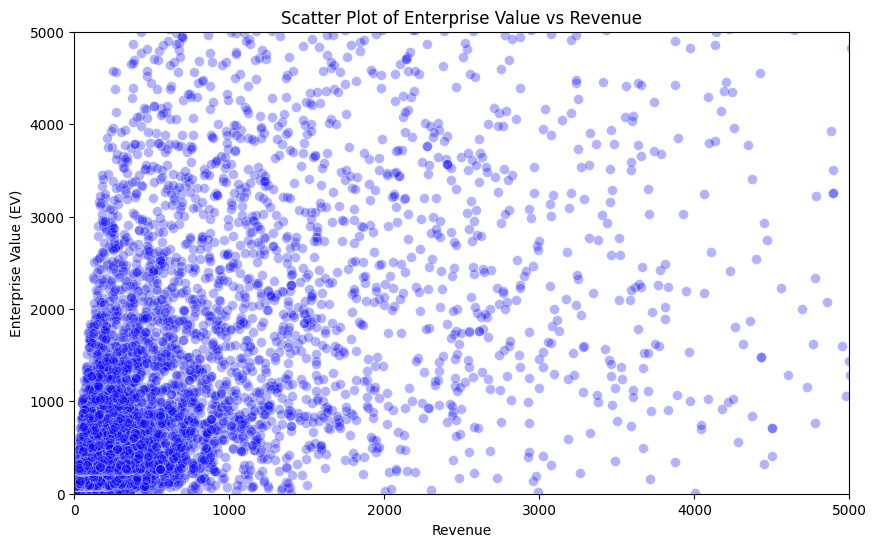

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['Target_Revenues'], y=df['Target_EV'], alpha=0.3, color='blue', s=50)

plt.xlabel('Revenue')
plt.ylabel('Enterprise Value (EV)')
plt.title('Scatter Plot of Enterprise Value vs Revenue')

plt.xlim(0, 5000)  # Example x-axis limits
plt.ylim(0, 5000)  # Example y-axis limits

plt.show()

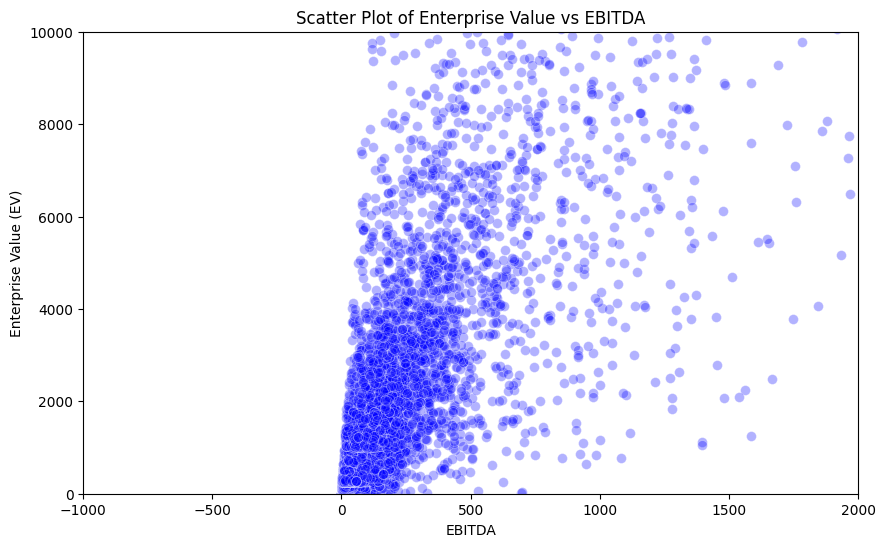

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['Target_EBITDA'], y=df['Target_EV'], alpha=0.3, color='blue', s=50)

plt.xlabel('EBITDA')
plt.ylabel('Enterprise Value (EV)')
plt.title('Scatter Plot of Enterprise Value vs EBITDA')

plt.xlim(-1000, 2000)  # Example x-axis limits
plt.ylim(0, 10000)  # Example y-axis limits

plt.show()

In [ ]:
df.head()

,Date,Target_Name,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,...,Target_Industry_Macro_Financials,Target_Industry_Macro_Healthcare,Target_Industry_Macro_High Technology,Target_Industry_Macro_Industrials,Target_Industry_Macro_Materials,Target_Industry_Macro_Media and Entertainment,Target_Industry_Macro_Real Estate,Target_Industry_Macro_Retail,Target_Industry_Macro_Telecommunications,Target_Status_Public
3,2024-08-03,Big Cheese Studio SA,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,...,0,0,1,0,0,0,0,0,0,1
6,2024-07-31,Lusa Agencia De Noticias De Portugal Sa,Publishing,Portugal,Republic of Portugal,Government and Agencies,National Government,Portugal,17.20,0.84,...,0,0,0,0,0,1,0,0,0,0
9,2024-07-17,Jelsingrad Livar Livnica Celika Ad Banja Luka,Metals & Mining,Bosnia and Herzegovina,Bll Steel Doo,Materials,Metals & Mining,Bosnia and Herzegovina,5.44,0.44,...,0,0,0,0,1,0,0,0,0,1
11,2024-07-12,Stil Termica Termo Idraulica Laziale Srl,Building/Construction & Engineering,Italy,Renovalo SpA,Industrials,Building/Construction & Engineering,Italy,1.16,0.39,...,0,0,0,1,0,0,0,0,0,0
12,2024-07-11,Resscapital AB,Other Financials,Sweden,Mangold AB,Financials,Brokerage,Sweden,8.33,5.76,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

Date                                                    datetime64[ns]
Target_Name                                                     object
Target_Industry_Mid                                             object
Target_Nation                                                   object
Buyer_Name                                                      object
Buyer_Industry_Macro                                            object
Buyer_Industry_Mid                                              object
Buyer_Nation                                                    object
Target_Revenues                                                float64
Target_EBITDA                                                  float64
Target_EV                                                      float64
Target_Industry_Detailed                                        object
Year                                                             int64
EV_Rev                                                         float64
EV_EBI

In [ ]:
#Check for nulls
nan_count=df.isnull().sum()
nan_count

Date                                                    0
Target_Name                                             0
Target_Industry_Mid                                     0
Target_Nation                                           0
Buyer_Name                                              0
Buyer_Industry_Macro                                    0
Buyer_Industry_Mid                                      0
Buyer_Nation                                            0
Target_Revenues                                         0
Target_EBITDA                                           0
Target_EV                                               0
Target_Industry_Detailed                                0
Year                                                    0
EV_Rev                                                  0
EV_EBITDA                                               0
Target_Region_A                                         0
Target_Macro_A                                          0
Target_Status_

### Planning the Features

- Target_Revenues (float64)
- Target_EBITDA (float64)
- Target_Industry (13 encoded)
- Target_Region (6 encoded)
- Target_Status (Prviate = 0, Public = 1)
- Date: *leave out for now*

### Cross-correlation matrix

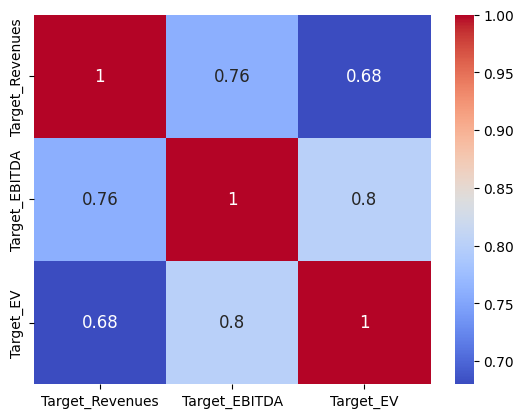

In [ ]:
plt.figure
sns.heatmap(round(df[['Target_Revenues', 'Target_EBITDA', 'Target_EV']].corr(),2),
            cmap='coolwarm',
            annot = True,
            annot_kws = {'size':12}
           );

### Dumb Model
- y-pred = average of y values
- RMSE as evaluation metric 

### First Regression

**We need 'statsmodels' as a requirement!**

In [ ]:
pip install statsmodels


[notice] A new release of pip available: 22.2.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
X1 = df['Target_Revenues']
X2 = df['Target_EBITDA']
y = df['Target_EV']

In [ ]:
model = smf.ols(formula = 'Target_EV ~ Target_Revenues + Target_EBITDA', data=df)
model = model.fit()

In [ ]:
model.params

Intercept         -633.650534
Target_Revenues      0.568065
Target_EBITDA        8.758583
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Target_EV   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                 1.001e+04
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:01:24   Log-Likelihood:            -1.2498e+05
No. Observations:               10740   AIC:                         2.500e+05
Df Residuals:                   10737   BIC:                         2.500e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -633.6505    269.617     -2.350      0.019   -1162.149    -105.152
Target_Revenues     0.5681      0.030     19.135      0.000       0.510       0.626
Target_EBITDA       8.7586      0.115     76.382      0.000       8.534       8.983
==============================================================================
Omnibus:                    20712.212   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        806867828.824
Skew:                          13.842   Prob(JB):                         0.00
Kurtosis:                    1345.494   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
rmse(X1,X2, axis=0)

11471.86643840262

rmse(X1, X2, axis=0)

#### Adding more features to the regression

In [ ]:
# Add public_private
model2 = smf.ols(formula = 'Target_EV ~ Target_Revenues + Target_EBITDA + C(Target_Status_A)', data=df)
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Target_EV   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     6676.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:01:24   Log-Likelihood:            -1.2498e+05
No. Observations:               10740   AIC:                         2.500e+05
Df Residuals:                   10736   BIC:                         2.500e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       58.1498    709.407      0.082      0.935   -1332.419    1448.718
C(Target_Status_A)[T.Public]  -808.3405    766.714     -1.054      0.292   -2311.241     694.560
Target_Revenues                  0.5695      0.030     19.163      0.000       0.511       0.628
Target_EBITDA                    8.7590      0.115     76.386      0.000       8.534       8.984
==============================================================================
Omnibus:                    20699.515   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        805608567.375
Skew:                          13.822   Prob(JB):                         0.00
Kurtosis:                    1344.446   Cond. No.                     5.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model2.params

Intercept                        58.149781
C(Target_Status_A)[T.Public]   -808.340465
Target_Revenues                   0.569527
Target_EBITDA                     8.759021
dtype: float64

In [ ]:
# Add Industry
model3 = smf.ols(formula = 'Target_EV ~ Target_Revenues + Target_EBITDA + C(Target_Macro_A)', data=df)
model3 = model3.fit()
print(model3.params)

Intercept                                      -2748.828939
C(Target_Macro_A)[T.Consumer Staples]           1992.785256
C(Target_Macro_A)[T.Energy and Power]           -994.151507
C(Target_Macro_A)[T.Financials]                 4631.946211
C(Target_Macro_A)[T.Healthcare]                 3072.685486
C(Target_Macro_A)[T.High Technology]            4371.363453
C(Target_Macro_A)[T.Industrials]                1656.135731
C(Target_Macro_A)[T.Materials]                  -120.776557
C(Target_Macro_A)[T.Media and Entertainment]    2497.190151
C(Target_Macro_A)[T.Real Estate]                3747.333868
C(Target_Macro_A)[T.Retail]                      424.104314
C(Target_Macro_A)[T.Telecommunications]        -1609.118043
Target_Revenues                                    0.579029
Target_EBITDA                                      8.731764
dtype: float64


In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Target_EV   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1552.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:01:24   Log-Likelihood:            -1.2495e+05
No. Observations:               10740   AIC:                         2.499e+05
Df Residuals:                   10726   BIC:                         2.500e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                    -2748.8289    950.094     -2.893      0.004   -4611.188    -886.470
C(Target_Macro_A)[T.Consumer Staples]         1992.7853   1478.497      1.348      0.178    -905.342    4890.913
C(Target_Macro_A)[T.Energy and Power]         -994.1515   1270.052     -0.783      0.434   -3483.689    1495.386
C(Target_Macro_A)[T.Financials]               4631.9462   1150.673      4.025      0.000    2376.414    6887.479
C(Target_Macro_A)[T.Healthcare]               3072.6855   1491.364      2.060      0.039     149.336    5996.035
C(Target_Macro_A)[T.High Technology]          4371.3635   1178.044      3.711      0.000    2062.178    6680.549
C(Target_Macro_A)[T.Industrials]              1656.1357   1184.551      1.398      0.162    -665.804    3978.076
C(Target_Macro_A)[T.Materials]                -120.7766   1306.103     -0.092      0.926   -2680.980    2439.427
C(Target_Macro_A)[T.Media and Entertainment]  2497.1902   1423.480      1.754      0.079    -293.094    5287.475
C(Target_Macro_A)[T.Real Estate]              3747.3339   1499.486      2.499      0.012     808.064    6686.604
C(Target_Macro_A)[T.Retail]                    424.1043   1555.968      0.273      0.785   -2625.880    3474.089
C(Target_Macro_A)[T.Telecommunications]      -1609.1180   1857.052     -0.866      0.386   -5249.284    2031.048
Target_Revenues                                  0.5790      0.030     19.462      0.000       0.521       0.637
Target_EBITDA                                    8.7318      0.115     76.013      0.000       8.507       8.957
==============================================================================
Omnibus:                    20736.858   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        807103876.583
Skew:                          13.883   Prob(JB):                         0.00
Kurtosis:                    1345.689   Cond. No.                     1.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Notes
- log transform Y
- bring log back when explaining np.exp()

#### Distribution of Y

In [ ]:
df['Target_EV'].describe()

count    1.074000e+04
mean     5.850810e+03
std      4.637929e+04
min      1.100000e-01
25%      5.686250e+01
50%      3.517700e+02
75%      2.073763e+03
max      2.540543e+06
Name: Target_EV, dtype: float64

In [ ]:
df['Target_EV'].nlargest(5)

13128    2540542.97
13404    2536581.04
13750    1152770.86
14101     795277.22
14289     726066.36
Name: Target_EV, dtype: float64

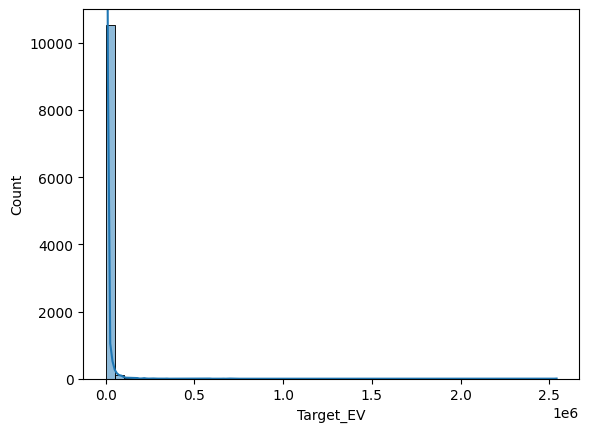

In [ ]:
sns.histplot(data=df, x='Target_EV', bins=50, kde=True)
plt.ylim(0,11000);

#### Log Transformation of Y

In [ ]:
df['log_Target_EV'] = df['Target_EV'].apply(lambda x: np.log(x))

In [ ]:
df['log_Target_EV'].describe()

count    10740.000000
mean         5.817543
std          2.528320
min         -2.207275
25%          4.040636
50%          5.862978
75%          7.637120
max         14.747888
Name: log_Target_EV, dtype: float64

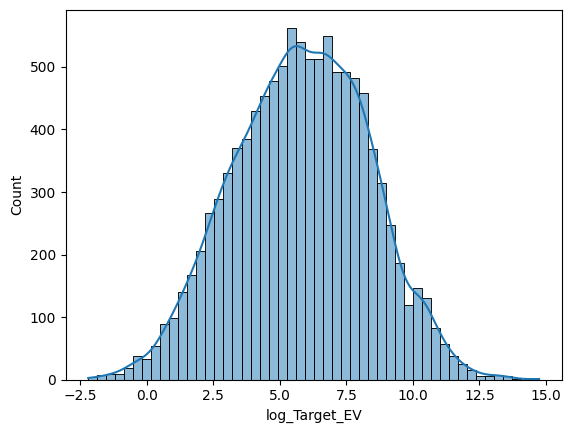

In [ ]:
sns.histplot(data=df, x='log_Target_EV', bins=50, kde=True);

#### Check Continuous Features for Normality

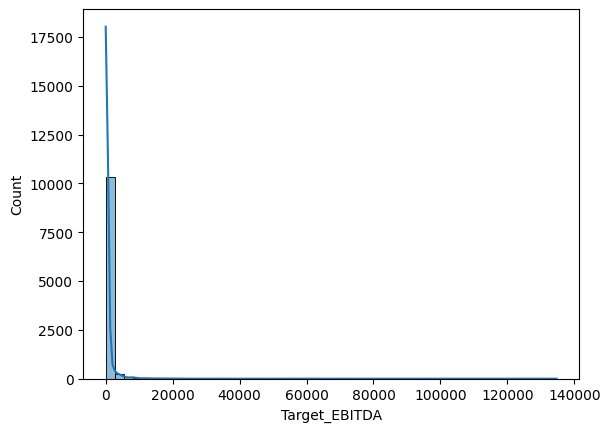

In [ ]:
#Target_EBITDA
sns.histplot(data=df, x='Target_EBITDA', bins=50, kde=True);

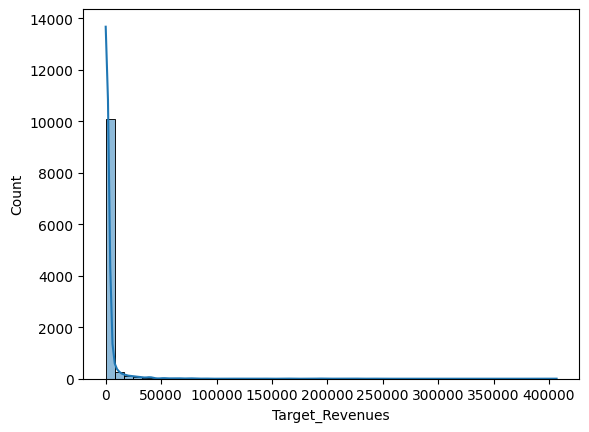

In [ ]:
#Target_Revenues
sns.histplot(data=df, x='Target_Revenues', bins=50, kde=True);

#### Log transform the continuous features

In [ ]:
df['log_Target_EBITDA'] = df['Target_EBITDA'].apply(lambda x: np.log(x))
df['log_Target_Revenues'] = df['Target_Revenues'].apply(lambda x: np.log(x))

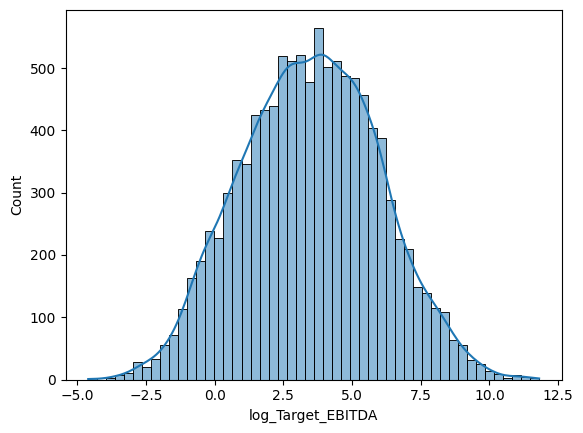

In [ ]:
sns.histplot(data=df, x='log_Target_EBITDA', bins=50, kde=True);

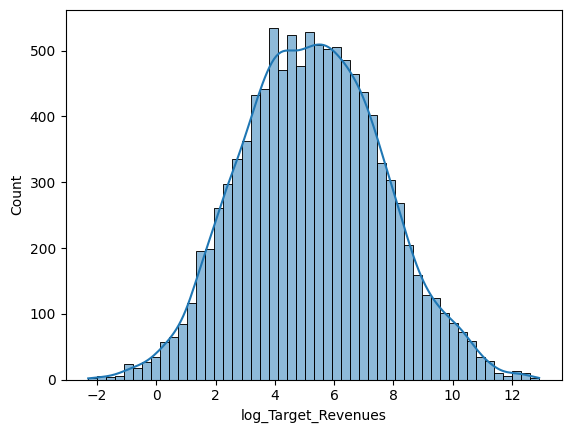

In [ ]:
sns.histplot(data=df, x='log_Target_Revenues', bins=50, kde=True);

#### Simplest regression model using Log-Y

In [ ]:
logmodel = smf.ols(formula = 'log_Target_EV ~ log_Target_EBITDA + log_Target_Revenues', data=df)
logmodel = logmodel.fit()
print(logmodel.params)

Intercept              2.195908
log_Target_EBITDA      0.825843
log_Target_Revenues    0.140576
dtype: float64


In [ ]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_Target_EV   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 3.915e+04
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:01:26   Log-Likelihood:                -13842.
No. Observations:               10740   AIC:                         2.769e+04
Df Residuals:                   10737   BIC:                         2.771e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.1959      0.026     85.470      0.000       2.146       2.246
log_Target_EBITDA       0.8258      0.009     90.660      0.000       0.808       0.844
log_Target_Revenues     0.1406      0.010     14.614      0.000       0.122       0.159
==============================================================================
Omnibus:                     1672.267   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5129.276
Skew:                          -0.811   Prob(JB):                         0.00
Kurtosis:                       5.972   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Re-transform logs to find R^2:
np.corrcoef(np.exp(logmodel.fittedvalues),np.exp(df.log_Target_EV))**2

array([[1.        , 0.70450012],
       [0.70450012, 1.        ]])

In [ ]:
# Reminder of number of observations
df.shape

(10740, 40)

#### Add categorical features to this model

In [ ]:
logcatmodel = smf.ols(formula = 'log_Target_EV ~ log_Target_EBITDA + log_Target_Revenues + C(Target_Macro_A) + C(Target_Region_A) + Target_Status_Public', data=df)

In [ ]:
logcatmodel = logcatmodel.fit()
print(logcatmodel.params)

Intercept                                       1.240818
C(Target_Macro_A)[T.Consumer Staples]           0.146308
C(Target_Macro_A)[T.Energy and Power]           0.062185
C(Target_Macro_A)[T.Financials]                 0.427892
C(Target_Macro_A)[T.Healthcare]                 0.410486
C(Target_Macro_A)[T.High Technology]            0.299241
C(Target_Macro_A)[T.Industrials]                0.035077
C(Target_Macro_A)[T.Materials]                 -0.123055
C(Target_Macro_A)[T.Media and Entertainment]    0.130886
C(Target_Macro_A)[T.Real Estate]                0.952593
C(Target_Macro_A)[T.Retail]                     0.050262
C(Target_Macro_A)[T.Telecommunications]         0.273262
C(Target_Region_A)[T.Nordics]                   0.400487
C(Target_Region_A)[T.North America]             0.604810
C(Target_Region_A)[T.Southern Europe]           0.433469
C(Target_Region_A)[T.UK]                        0.399611
C(Target_Region_A)[T.Western Europe]            0.425823
log_Target_EBITDA              

In [ ]:
logcatmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_Target_EV   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     4817.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:01:26   Log-Likelihood:                -13090.
No. Observations:               10740   AIC:                         2.622e+04
Df Residuals:                   10720   BIC:                         2.637e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        1.2408      0.049     25.202      0.000       1.144       1.337
C(Target_Macro_A)[T.Consumer Staples]            0.1463      0.045      3.283      0.001       0.059       0.234
C(Target_Macro_A)[T.Energy and Power]            0.0622      0.039      1.593      0.111      -0.014       0.139
C(Target_Macro_A)[T.Financials]                  0.4279      0.036     11.920      0.000       0.358       0.498
C(Target_Macro_A)[T.Healthcare]                  0.4105      0.045      9.142      0.000       0.322       0.499
C(Target_Macro_A)[T.High Technology]             0.2992      0.035      8.443      0.000       0.230       0.369
C(Target_Macro_A)[T.Industrials]                 0.0351      0.036      0.984      0.325      -0.035       0.105
C(Target_Macro_A)[T.Materials]                  -0.1231      0.040     -3.112      0.002      -0.201      -0.046
C(Target_Macro_A)[T.Media and Entertainment]     0.1309      0.043      3.053      0.002       0.047       0.215
C(Target_Macro_A)[T.Real Estate]                 0.9526      0.046     20.607      0.000       0.862       1.043
C(Target_Macro_A)[T.Retail]                      0.0503      0.047      1.066      0.286      -0.042       0.143
C(Target_Macro_A)[T.Telecommunications]          0.2733      0.056      4.890      0.000       0.164       0.383
C(Target_Region_A)[T.Nordics]                    0.4005      0.038     10.588      0.000       0.326       0.475
C(Target_Region_A)[T.North America]              0.6048      0.030     20.194      0.000       0.546       0.664
C(Target_Region_A)[T.Southern Europe]            0.4335      0.035     12.548      0.000       0.366       0.501
C(Target_Region_A)[T.UK]                         0.3996      0.038     10.590      0.000       0.326       0.474
C(Target_Region_A)[T.Western Europe]             0.4258      0.035     12.250      0.000       0.358       0.494
log_Target_EBITDA                                0.7286      0.009     77.732      0.000       0.710       0.747
log_Target_Revenues                              0.2180      0.010     21.831      0.000       0.198       0.238
Target_Status_Public                             0.2504      0.028      9.078      0.000       0.196       0.305
==============================================================================
Omnibus:                     2027.554   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7493.457
Skew:                          -0.916   Prob(JB):                         0.00
Kurtosis:                       6.659   Cond. No.                         96.4
==============================================================================

Notes:
[1

In [ ]:
# Re-transform logs to find R^2:
np.corrcoef(np.exp(logcatmodel.fittedvalues),np.exp(df.log_Target_EV))**2

array([[1.        , 0.74915744],
       [0.74915744, 1.        ]])

## KNN Model

In [ ]:
# Step 1: Prepare the Data
# Assuming df is already in your environment
X = df[['log_Target_Revenues', 'log_Target_EBITDA', 'Target_Status_Public', 'Target_Region_Eastern Europe', 'Target_Region_Nordics', 'Target_Region_North America', 'Target_Region_Southern Europe', 'Target_Region_UK', 'Target_Region_Western Europe', 'Target_Industry_Macro_Consumer Products and Services', 'Target_Industry_Macro_Consumer Staples','Target_Industry_Macro_Energy and Power','Target_Industry_Macro_Financials','Target_Industry_Macro_Healthcare','Target_Industry_Macro_High Technology','Target_Industry_Macro_Industrials','Target_Industry_Macro_Materials','Target_Industry_Macro_Media and Entertainment','Target_Industry_Macro_Real Estate','Target_Industry_Macro_Retail','Target_Industry_Macro_Telecommunications']]
y = df['log_Target_EV']

In [ ]:
# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Standardize the Data (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 4: Train the KNN Model
knn = KNeighborsRegressor(n_neighbors=5)  # You can change the number of neighbors
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
# Step 5: Predict on Training and Testing Sets
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [ ]:
# Step 6: Evaluate the Model on Training Data
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

In [ ]:
# Step 7: Evaluate the Model on Testing Data
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

In [ ]:
# Print the results
print('Performance on Training Data:')
print(f'Root Mean Squared Error (Train): {train_rmse}')
print(f'R^2 Score (Train): {train_r2}')
print('\nPerformance on Testing Data:')
print(f'Root Mean Squared Error (Test): {test_rmse}')
print(f'R^2 Score (Test): {test_r2}')

Performance on Training Data:
Root Mean Squared Error (Train): 0.7168909074883051
R^2 Score (Train): 0.9201343879527047

Performance on Testing Data:
Root Mean Squared Error (Test): 0.9072027665043759
R^2 Score (Test): 0.8675915075465925


In [ ]:
# Re-transform logs to find R^2:
np.corrcoef(np.exp(y_test_pred),np.exp(y_test))**2

array([[1.        , 0.74635993],
       [0.74635993, 1.        ]])

#### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
# Step 1: Prepare the Data
X = df[['log_Target_Revenues', 'log_Target_EBITDA', 'Target_Region_Eastern Europe', 'Target_Region_Nordics', 'Target_Region_North America', 'Target_Region_Southern Europe', 'Target_Region_UK', 'Target_Region_Western Europe', 'Target_Industry_Macro_Consumer Products and Services', 'Target_Industry_Macro_Consumer Staples','Target_Industry_Macro_Energy and Power','Target_Industry_Macro_Financials','Target_Industry_Macro_Healthcare','Target_Industry_Macro_High Technology','Target_Industry_Macro_Industrials','Target_Industry_Macro_Materials','Target_Industry_Macro_Media and Entertainment','Target_Industry_Macro_Real Estate','Target_Industry_Macro_Retail','Target_Industry_Macro_Telecommunications']]
y = df['log_Target_EV']
# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Step 3: Standardize the Data (important for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Step 4: Train the Ridge Regression Model
ridge_reg = Ridge(alpha=10)  # You can adjust alpha to control regularization strength
ridge_reg.fit(X_train_scaled, y_train)
# Step 5: Predict on Training and Testing Sets
y_train_pred = ridge_reg.predict(X_train_scaled)
y_test_pred = ridge_reg.predict(X_test_scaled)
# Step 6: Evaluate the Model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
# Print the evaluation metrics
print('Performance on Training Data:')
print(f'Root Mean Squared Error (Train): {train_rmse}')
print(f'R^2 Score (Train): {train_r2}')
print('\nPerformance on Testing Data:')
print(f'Root Mean Squared Error (Test): {test_rmse}')
print(f'R^2 Score (Test): {test_r2}')

Performance on Training Data:
Root Mean Squared Error (Train): 0.8222020548658752
R^2 Score (Train): 0.8958611778010817

Performance on Testing Data:
Root Mean Squared Error (Test): 0.8214864616815983
R^2 Score (Test): 0.8903167730074126


In [ ]:
# Re-transform logs to find R^2:
np.corrcoef(np.exp(y_test_pred),np.exp(y_test))**2

array([[1.        , 0.79027501],
       [0.79027501, 1.        ]])

## Scratch work below this point

#### Simplest model using Y (not log)

In [ ]:
model = smf.ols(formula = 'Target_EV ~ Target_EBITDA + Target_Revenues', data=df)
model = model.fit()
print(model.params)

Intercept         -633.650534
Target_EBITDA        8.758583
Target_Revenues      0.568065
dtype: float64


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Target_EV   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                 1.001e+04
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:01:27   Log-Likelihood:            -1.2498e+05
No. Observations:               10740   AIC:                         2.500e+05
Df Residuals:                   10737   BIC:                         2.500e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -633.6505    269.617     -2.350      0.019   -1162.149    -105.152
Target_EBITDA       8.7586      0.115     76.382      0.000       8.534       8.983
Target_Revenues     0.5681      0.030     19.135      0.000       0.510       0.626
==============================================================================
Omnibus:                    20712.212   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        806867828.824
Skew:                          13.842   Prob(JB):                         0.00
Kurtosis:                    1345.494   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Rerun log-model with removing outliers

In [ ]:
#Keep EV_Rev < 100
df = df[df['EV_Rev'] < 20] # was 100
#Keep EV_EBITDA >-100 and <500
df = df[df['EV_EBITDA'] > 0] # was -100
df = df[df['EV_EBITDA'] < 50] # was 500
df.shape

(10341, 40)

- 14776 - 10341 = 4435 removed

In [ ]:
logmodel = smf.ols(formula = 'log_Target_EV ~ Target_EBITDA + Target_Revenues', data=df)
logmodel = logmodel.fit()
print(logmodel.params)

Intercept          5.644237
Target_EBITDA      0.000067
Target_Revenues    0.000050
dtype: float64


In [ ]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_Target_EV   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     745.6
Date:                Tue, 03 Sep 2024   Prob (F-statistic):          3.18e-303
Time:                        16:01:27   Log-Likelihood:                -23610.
No. Observations:               10341   AIC:                         4.723e+04
Df Residuals:                   10338   BIC:                         4.725e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.6442      0.024    237.050      0.000       5.598       5.691
Target_EBITDA     6.73e-05   9.94e-06      6.773      0.000    4.78e-05    8.68e-05
Target_Revenues  5.023e-05   2.57e-06     19.510      0.000    4.52e-05    5.53e-05
==============================================================================
Omnibus:                      382.406   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.904
Skew:                          -0.467   Prob(JB):                     1.63e-94
Kurtosis:                       3.362   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
np.corrcoef(np.exp(logmodel.fittedvalues),np.exp(df.log_Target_EV))**2

array([[1.        , 0.28216323],
       [0.28216323, 1.        ]])